# Regressão com NN

## Introdução

Vimos anteriormente qual o tipo de resposta esperamos com uma regressão. Veremos agora uma outra forma de prever valores numéricos porém utilizando redes neurais.

Vamos rapidamente discutir como é formada a estrutura de uma rede e como sua arquitetura se comporta.

## Exemplo de implementação de Rede Neural

![SVM01](https://cdn-images-1.medium.com/max/1600/1*DW0Ccmj1hZ0OvSXi7Kz5MQ.jpeg)

Cada nó desta rede executa a soma de cada peso recebido por seus nós anteriores e tem sua multiplicação propagada por uma função de ativação:

![SVM02](https://www.analyticsvidhya.com/wp-content/uploads/2016/03/2.-ann-structure.jpg)

A estrutura tenta representar o que ocorre em um neurônio quando estimulado:

![SVM03](https://www.codeproject.com/KB/AI/1205732/neuron.png)

![SVM04](https://cdn-images-1.medium.com/max/2000/1*1Jr-Lt9vcEOW2opvZyLbdA.png)

Diferente dos modelos apresentados anteriormente, uma rede neural trabalha melhor com um número maior de features e pode precisar de um número muito maior de entradas de treino para convergir de maneira satisfatória.

In [0]:
from IPython.lib.display import YouTubeVideo

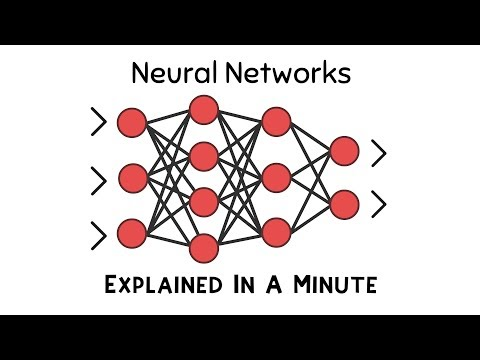

In [2]:
YouTubeVideo('rEDzUT3ymw4', width = 720, height = 560)

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets.samples_generator import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Gerando uma base de dados

`make_regression` cria uma amostra randômica para estudos que envolvem regressão.

---

| Parâmetro | Descrição |
|--|--|
| n_samples | O número de amostras |
| n_features | O número de features |
| noise | Desvio padrão do ruído aplicado |


In [0]:
?make_regression

In [0]:
X, y = make_regression(n_samples = 1000, n_features = 20, noise = 0.1)

In [6]:
X[0]

array([-6.46946223e-01, -7.35208790e-01, -1.75904328e-03, -2.13246895e+00,
       -1.37497052e+00,  9.84406988e-01, -8.31195931e-01, -1.69586271e-01,
        7.97919114e-01, -4.04094513e-01,  2.84605458e+00,  1.42910656e+00,
        9.35245145e-01, -1.09543194e-01, -4.22524336e-01,  6.47454645e-02,
       -5.82402226e-01,  1.18258916e+00, -6.24832821e-01, -2.55192685e+00])

In [7]:
y[0]

-72.6355683227977

## Separando nossa informação em treino / teste

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

## Padronizando os dados

In [0]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train[:, None])
y_test = y_scaler.transform(y_test[:, None])

In [10]:
X_train[0]

array([ 0.95146355, -0.1797865 , -1.4585923 ,  1.5512195 ,  2.05740964,
        0.60984208, -0.69155158, -0.2282166 ,  0.82439095, -0.20316265,
       -0.98580504, -0.03623955, -0.97589059, -0.1692413 , -1.17361733,
       -0.70616458,  0.59592545,  0.93421145, -1.10805652,  2.42170904])

In [11]:
y_train[0]

array([-0.06526505])

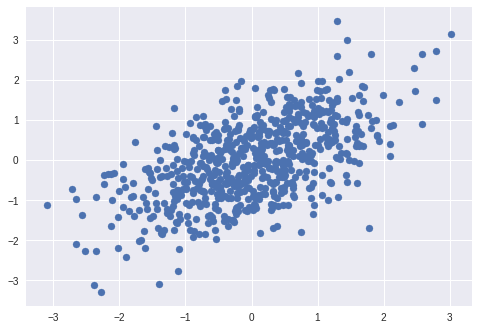

In [12]:
plt.scatter(X_train[:, 0], y_train)

## Tensorflow

O [TensorFlow™](https://www.tensorflow.org/?hl=pt-br) é uma biblioteca de software de código aberto para computação numérica que usa gráficos de fluxo de dados.

[TensorFlow Playground](playground.tensorflow.org)

### Sequential()

`Sequential` é a classe que encapsula a lista de camadas que que dará forma ao modelo.

```python
model = Sequential()
model.add(Dense(32, input_shape = (500,)))
model.add(Dense(32))
```


### Dense

`Dense` é a classe que implementa uma camada do modelo.

---

| Parâmetro | Descrição |
|--|--|
| units | Dimensão da camada |
| activation | A função de ativação dos nós |
| input_shape | Dimensão dos inputs da rede |

### RMSPropOptimizer

`RMSPropOptimizer` classe que controla o otimizador da rede.

### keras.Sequential.compile

Compila o modelo, geralmente recebe como parâmetro `loss`, `optimizer`, `metrics`.

---

| Parâmetro | Descrição |
|--|--|
| loss | Função considerada para cálculo do erro de saída do modelo |
| optimizer | Função utilizada para otimizar o modelo |
| metrics | Lista de métricas utilizadas para medir o desempenho do modelo durante o treino e teste |

In [0]:
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(64, activation=tf.nn.relu))
    model.add(keras.layers.Dense(1))

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model


| Layer (type)  | Output Shape | Param # |
|--|--|--|
| dense_3 (Dense) | (None, 64) | 1344 |
| dense_4 (Dense) | (None, 64) | 4160 |
| dense_5 (Dense) | (None, 1) | 65 |

---

- Layer (type) - Retorna nome da camada e tipo
- Output Shape - Retorna dimensão do vetor
- Param # - Retorna a o resultado de $inputs \times nós + bias $

Ex. $20 \times 64 + 64 = 1344$

Podemos plotar o erro para nosso dado de treino e teste num gráfico.

Facilitando a verificação de overfit e underfit.

In [0]:
def plot_history(history):
  plt.figure(figsize = (15, 10))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label = 'Val loss')
  plt.legend()

Vemos que houve pouco melhora em nosso modelo após a época 200. Podemos criar um gatilho de earlystopping.

Este gatilho irá automaticamente parar o treinamento caso ele não veja melhoria no modelo em um número definido de épocas.

Para isso, devemos modificar o nosso modelo:

In [0]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20)

history = model.fit(X_train, y_train, epochs = 500, validation_split = 0.2, verbose = False, callbacks = [early_stop])

Calculando o erro obtido no teste do modelo

In [16]:
[loss, mae] = model.evaluate(X_test, y_test)

print("Mean Abs Error: {:.4f}".format(mae))

330/330 [==============================] - 0s 62us/step
Mean Abs Error: 0.1029


Vamos ver como o modelo se comporta ao prever pontos.

In [0]:
test_preds = model.predict(X_test).flatten()

## Como identificar Overfitting e Underfitting?

Overfiting e Underfitting são o caso de resultados ruins em modelos de inteligência artificial.

Podemos classificar como:

- **Underfitting**
 - O modelo tem resultados ruins com a parcela de treino e validação, ou seja, o modelo não é capaz de entregar o resultado esperado por causa de sua arquitetura ou da qualidade da informação que lhe é apresentada.
 

- **Overfitting**
 - O modelo tem resultados excelentes com sua parcela de treinamento, mas é incapaz de reproduzir os mesmos resultados com a parcela de validação.
 
 ![PIC2](https://shapeofdata.files.wordpress.com/2013/02/overfitting.png)

#### Underfitting

- Quando verificamos que o erro da parcela de treino é menor que a de validação e existe uma tendência de queda na parcela de validação, ou seja, esse valor de erro pode melhorar com um número maior de épocas.

 ![PIC3](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/Diagnostic-Line-Plot-Showing-an-Underfit-Model.png)

- Outro exemplo é quando temos um comportamento parecido entre a curva de treino e validação, porém, temos uma variação no erro entre estas curvas. Esse comportamento pode ser causado por um *underfit* da rede e, neste caso, pode ser corrigido modificando a estrutura da rede.


 ![PIC4](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/Diagnostic-Line-Plot-Showing-an-Underfit-Model-via-Status.png)

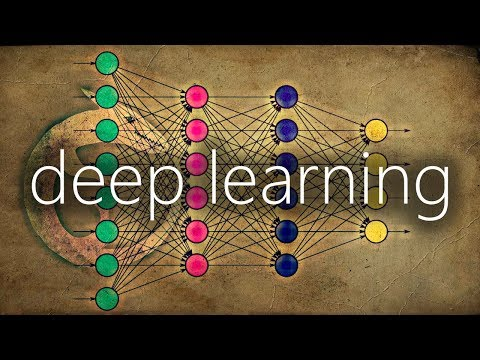

In [18]:
YouTubeVideo('0h8lAm5Ki5g', width = 720, height = 560)

#### Overfitting

- Quando verificamos que o erro da parcela de treino melhora quanto maior é o número de épocas, porém, a parcela de validação tem um comportamento completamente oposto ou vemos este erro diminuir até um determinado ponto e depois degradar.

 ![PIC3](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/07/Diagnostic-Line-Plot-Showing-an-Overfit-Model.png)

Podemos combater o *overfit* da rede adicionando uma regularização dos peso do modelo ou uma política de dropout.

#### Regularização de peso

- **L1 regularization**
 - O custo adicionado é proporcional a soma dos valores absolutos dos pesos.

- **L2 regularization**
 - O custo adicionado é proporcional a soma dos valores quadráticos dos pesos.
 
Em poucas palavras, L1 tem o mesmo efeito de reduzir o número de inputs da rede, fazendo com que inputs que tem peso pequeno se aproximem de zero e reduzindo o ruído causado. L2 resulta valores de peso geral menores e estabiliza os pesos quando há alta correlação entre os recursos de entrada.

#### Dropout

Dropout se resume em, aleatoriamente, desligar conexões entre os nós de duas camadas. Diminuindo assim a complexidade da arquitetura da rede.

 ![PIC3](https://cdn-images-1.medium.com/max/800/1*iWQzxhVlvadk6VAJjsgXgg.png)



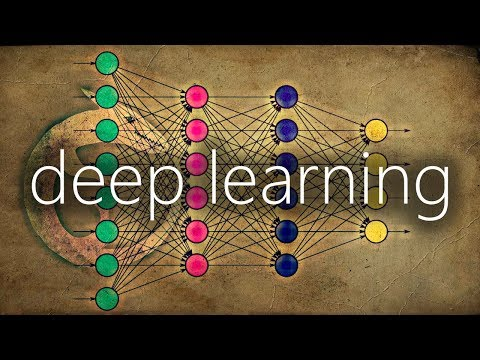

In [19]:
YouTubeVideo('DEMmkFC6IGM', width = 720, height = 560)

## Resumo

- O erro quadrático médio (MSE) é comumente utilizado na predição de valores numéricos discretos em problemas de regressão linear;
- Diferente de problemas de classificação; Para problemas de regressão é comum utilizar métricas como o erro médio absoluto (MAE);
- Quando nossos inputs estão em _ranges_ distintos, é uma boa prática quando falamos de modelos que dependem de cálculo de distâncias a padronização ou normalização destes valores;
- Se o número de amostras for pequeno, de preferência sempre a redes com poucas camadas escondidas para evitar _overfit_ da rede.
- EarlyStopping é um bom meio de evitar o _overfit_.

## Desafio:

Criar um modelo de rede neural para resolver o problema da aula passada. Utilize os mesmos meios demonstrados acima. Para facilitar, vou importar os dados em um formato de dataset.

In [20]:
dados = pd.read_csv('https://github.com/pgiaeinstein/comp_cog/raw/master/custo_colaborador_filtro.csv')
dados.head()

,idade,sexo,imc,qtd_criancas,fumante,regiao,custos
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [0]:
X = dados.iloc[:, :6].values
y = dados.iloc[:, -1].values

In [22]:
X[0]

array([19. ,  0. , 27.9,  0. ,  1. ,  3. ])

In [23]:
y[0]

16884.924

# Classificação com NN

Com aquilo que aprendemos, vamos tentar resolver um problema de classificação binária. Veja como é simples apenas modificando um pouco a estrutura de nossa rede.

In [0]:
from sklearn.datasets import make_classification

In [0]:
X, y = make_classification(n_samples = 100000)

In [26]:
X[0]

array([ 0.68050797,  0.30852531,  1.34572948, -0.21698295, -0.58637966,
       -0.69872659, -0.66854796,  0.24374376,  0.12850398,  0.94941099,
       -2.00707526,  0.55755158,  0.08169963,  0.22906181,  0.15406136,
       -0.96224313,  0.3681548 ,  0.57644095, -2.49418931,  0.97907387])

In [27]:
y[0]

0

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

In [0]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [30]:
X_train[0]

array([ 0.3091315 ,  0.82561075,  1.10487711,  1.5650163 , -0.91970215,
        0.52838523, -0.63598768, -0.5012493 , -1.52799165,  0.11261166,
       -0.53034205, -0.1507016 , -1.49704536, -0.68255911, -1.29433107,
       -0.69241815, -1.44560801,  2.81402561,  2.07922624, -0.36995353])

Vamos criar nossa função `build_model` verifique que agora temos um problema de classificação binário, sendo assim, iremos utilizar como função de loss a `binary_crossentropy`.

In [0]:
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(20, input_dim = 20, activation=tf.nn.relu))
    model.add(keras.layers.Dense(40, activation=tf.nn.relu))
    model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

Verifique que modificamos também nossa função de otimização e métrica. Para entender melhor como o algoritmo de otimização "adam" funciona, veja o seguinte [artigo](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/).

Vamos modificar nossa função para plotar os gráficos

In [0]:
def plot_history(history):
  plt.figure(figsize = (15, 10))
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['acc']), label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_acc']), label = 'Val loss')
  plt.legend()

In [0]:
model = build_model()

history = model.fit(X_train, y_train, epochs = 5, validation_split = 0.2, verbose = False)

In [34]:
[loss, acc] = model.evaluate(X_test, y_test)

print("Acc: {:.4f}".format(acc))

50000/50000 [==============================] - 1s 21us/step
Acc: 0.9529


In [0]:
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

Podemos plotar nossa matriz de confusão:

In [36]:
test_preds = model.predict(X_test).flatten()
test_preds_bin = (test_preds > 0.5)
test_preds_bin

array([False, False,  True, ..., False, False,  True])

## Curva ROC

A Curva de operação do receptor (*Receiver Operationg Characteristic*)  é uma representação gráfica que ilustra o desempenho (ou performance) de um sistema classificador binário e como o seu limiar de discriminação é variado. [Wikipedia](https://pt.wikipedia.org/wiki/Caracter%C3%ADstica_de_Opera%C3%A7%C3%A3o_do_Receptor)

 ![PIC6](https://ncss-wpengine.netdna-ssl.com/wp-content/uploads/2016/06/ROC-Curves-Empirical-19.png)

#### Sensitivity

Também chamada de *true positive rate*, *recall* ou *probabilidade de detecção*. Mede a proporção de positivos realmente detectados como positivos.

$$
TPR = \frac{TP}{TP + FN}
$$

#### Specificity

Também chamada de *true negative rate*, mede a proporção de negativos realmente detectados como negativos.

$$
TNR = \frac{TN}{TN + FP}
$$

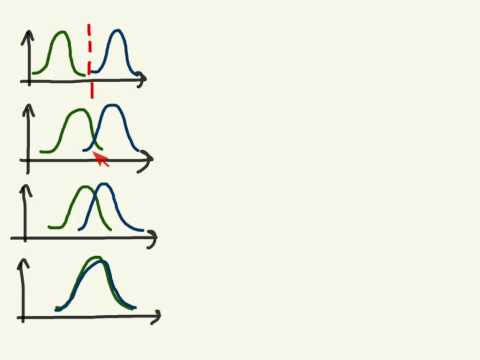

In [37]:
YouTubeVideo('21Igj5Pr6u4', width = 720, height = 560)

Obtendo os valores:

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
auc_calc = auc(fpr, tpr)

## Desafio

Utilize o dataset fornecido a tente criar um modelo capaz de classificar os dados não conhecidos pela coluna diagnóstico.

In [0]:
df = pd.read_csv('https://github.com/pgiaeinstein/aula-09/raw/master/df_map.csv')

In [0]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [0]:
notebook_seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = notebook_seed)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trabalhando com arquivos DICOM

## O que é DICOM?

- DICOM - Digital Imaging and Communications in Medicine;

- Conjunto de normas para tratamento, armazenamento e transmissão de informação médica (PROTOCOLO);
 - Padroniza a formatação das imagens diagnósticas como tomografias, ressonâncias magnéticas, radiografias, ultrassonografias, etc...;
  - Permite que imagens médicas e informações associadas sejam trocadas entre equipamentos de diagnóstico geradores de imagens, computadores e hospitais, ou seja, estabelece uma linguagem comum entre os equipamentos de diferentes marcas.

[Wikipedia](https://pt.wikipedia.org/wiki/DICOM)

## Protocolo?

- Convenção que controla e possibilita uma conexão, comunicação, transferência de dados entre dois sistemas computacionais.

- Define regras de sintaxe, semântica e sincronização da comunicação.

---

| Protocolo | Descrição |
|--|--|
| IP | [Internet Protocol](https://pt.wikipedia.org/wiki/Internet_Protocol "Internet Protocol") |
| HTTP | [Hypertext Transfer Protocol](https://pt.wikipedia.org/wiki/HTTP "HTTP") |
| POP3 | [Post Office Protocol](https://pt.wikipedia.org/wiki/Post_Office_Protocol "Post Office Protocol") |
| SMTP | [Simple Mail Transfer Protocol](https://pt.wikipedia.org/wiki/Simple_Mail_Transfer_Protocol "Simple Mail Transfer Protocol") |


## PyDICOM

In [39]:
!wget "https://github.com/pgiaeinstein/aula-09/raw/master/img1.dcm"
!wget "https://github.com/pgiaeinstein/aula-09/raw/master/img2.dcm"


Redirecting output to ‘wget-log’.

Redirecting output to ‘wget-log.1’.


In [40]:
# É necessário instalar o pacote pydicom pelo gerenciador de pacotes pip
!pip install pydicom

    100% |████████████████████████████████| 6.7MB 850kB/s 


In [0]:
# Após isso, podemos importar o pacote
import pydicom
import pylab

In [42]:
dcmdata = pydicom.read_file('./img1.dcm')
print(dcmdata)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.4675.1517874309.43480
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '00f2de16-a231-40c3-9a5f-8198f530a4b0'
(0010, 0020) Patient ID                          LO: '00f2de16-a231-40c3-9a5f-8198f530a4b0'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's 

In [43]:
dcmimg = dcmdata.pixel_array
print(dcmimg.dtype)
print(dcmimg.shape)

uint8
(1024, 1024)


(-0.5, 1023.5, 1023.5, -0.5)

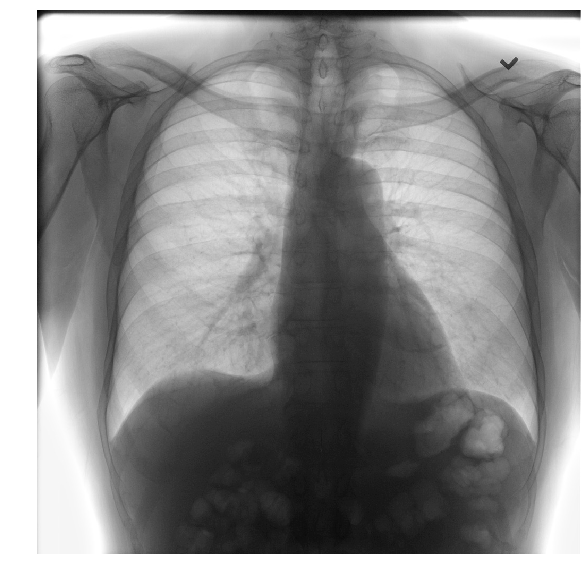

In [44]:
plt.figure(figsize=(20,10))
plt.imshow(dcmimg, cmap=pylab.cm.binary)
plt.axis('off')

## Desafio

Repita o processo acima para o arquivo img2.dcm